In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot
from numpy import where
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, f1_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# from tensorflow import keras
# from tensorflow.keras import backend as K
# from tensorflow.keras.preprocessing import sequence, text
# from tensorflow.keras import metrics
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, BatchNormalization, Activation, Conv1D, MaxPooling1D, Flatten, GlobalMaxPooling1D
# from tensorflow.keras.models import load_model
# from tensorflow.keras.callbacks import ModelCheckpoint
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from keras.utils.np_utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report
# from tensorflow.keras.utils import plot_model

In [2]:
df = pd.read_csv('ProcessedData/dataset.csv')
df.head
y=df['y']
X = df.iloc[:,1:-1]
#y=df.iloc[:,-1:]
counter = Counter(y)
print(counter)

Counter({0.0: 1006926, 3.0: 206436, 2.0: 73068, 1.0: 55216})


C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy={0: 251732} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


Counter({0: 251732, 1: 251732, 2: 251731, 3: 251731})


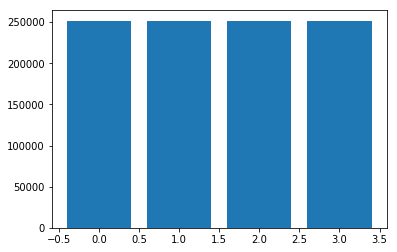

In [3]:
#X, y = df[:, :-1], df[:, -1]
y = LabelEncoder().fit_transform(y)
strategy = {1:251732, 2:251731, 3:251731}
oversample = SMOTE(sampling_strategy=strategy)
#oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
strategy={0:251732}
under = RandomUnderSampler({0:251732})
X, y = under.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
print(counter)
'''for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))'''
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [42]:
clf = RandomForestClassifier(max_depth=30, random_state=0)

In [43]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, random_state=0)

In [44]:
y_pred2 = clf.predict(X_train)

In [45]:
y_p_test = clf.predict(X_test)

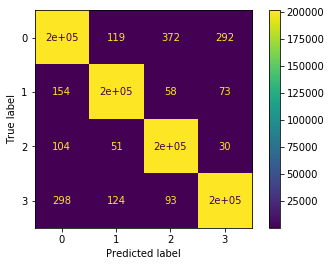

In [46]:
plot_confusion_matrix(clf, X_train, y_train)  

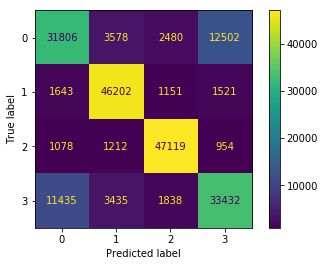

In [47]:
plot_confusion_matrix(clf, X_test, y_test)  

In [48]:
confusion_matrix(y_train, y_pred2)

array([[200583,    119,    372,    292],
       [   154, 200930,     58,     73],
       [   104,     51, 201183,     30],
       [   298,    124,     93, 201076]], dtype=int64)

In [49]:
accuracy_score(y_train, y_pred2)

0.9978051989969462

In [50]:
accuracy_score(y_test, y_p_test)

0.7873387425143754

In [51]:
f1_score(y_train, y_pred2, average='weighted')


0.9978049386539267

In [52]:
f1_score(y_test, y_p_test, average='weighted')


0.783870883136961

# STOP

In [ ]:
x_time = pd.read_csv('TestData/subject_009_01__x_time.csv', header=None)
x_time.columns = ['time']
x = pd.read_csv('TestData/subject_009_01__x.csv', header=None)
y_time = pd.read_csv('TestData/subject_009_01__y_time.csv', header=None)
y_time.columns = ['time']
x_v = x.to_numpy()

In [ ]:
y_pred = clf.predict(x_v)

In [ ]:
len(y_pred)

In [ ]:
def convert_final_pred(pred, size_x, size_y, append=0):
    final_pred=[]
    cur_x = 0
    for i in range(size_y+append):
        if cur_x > size_x:
            break
        final_pred.append(pred[cur_x])
        cur_x +=4
    return final_pred

In [187]:
f_pred = convert_final_pred(y_pred, len(x), len(y_time), 1) #+1

In [188]:
len(f_pred)

9498

In [189]:
with open('TestPredictions/subject_009_01__y_prediction.csv', 'w') as file:
    for val in f_pred:
        file.write(str(int(val)))
        file.write("\n")


In [190]:
x_time = pd.read_csv('TestData/subject_010_01__x_time.csv', header=None)
x_time.columns = ['time']
x = pd.read_csv('TestData/subject_010_01__x.csv', header=None)
y_time = pd.read_csv('TestData/subject_010_01__y_time.csv', header=None)
y_time.columns = ['time']
x_v = x.to_numpy()

In [191]:
y_pred = clf.predict(x_v)

In [192]:
f_pred = convert_final_pred(y_pred, len(x), len(y_time))

In [193]:
with open('TestPredictions/subject_010_01__y_prediction.csv', 'w') as file:
    for val in f_pred:
        file.write(str(int(val)))
        file.write("\n")


In [194]:
len(y_time)

12270

In [195]:
x_time = pd.read_csv('TestData/subject_011_01__x_time.csv', header=None)
x_time.columns = ['time']
x = pd.read_csv('TestData/subject_011_01__x.csv', header=None)
y_time = pd.read_csv('TestData/subject_011_01__y_time.csv', header=None)
y_time.columns = ['time']
x_v = x.to_numpy()

In [196]:
y_pred = clf.predict(x_v)

In [197]:
len(y_time)

12940

In [198]:
len(x_v)

51761

In [199]:
f_pred = convert_final_pred(y_pred, len(x), len(y_time))

In [200]:
with open('TestPredictions/subject_011_01__y_prediction.csv', 'w') as file:
    for val in f_pred:
        file.write(str(int(val)))
        file.write("\n")

In [201]:
x_time = pd.read_csv('TestData/subject_012_01__x_time.csv', header=None)
x_time.columns = ['time']
x = pd.read_csv('TestData/subject_012_01__x.csv', header=None)
y_time = pd.read_csv('TestData/subject_012_01__y_time.csv', header=None)
y_time.columns = ['time']
x_v = x.to_numpy()

In [202]:
y_pred = clf.predict(x_v)

In [203]:
len(y_time)

11330

In [204]:
len(x_v)

45319

In [205]:
f_pred = convert_final_pred(y_pred, len(x), len(y_time), 1) #+1

In [206]:
with open('TestPredictions/subject_012_01__y_prediction.csv', 'w') as file:
    for val in f_pred:
        file.write(str(int(val)))
        file.write("\n")